In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 10, test_size = 0.2)

In [52]:
model = RandomForestRegressor(n_estimators = 5)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5)

In [53]:
mdi = model.feature_importances_
indices_mdi = np.argsort(mdi)

pfi_result = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 50)
pfi = pfi_result.importances_mean
indices_pfi = np.argsort(pfi)

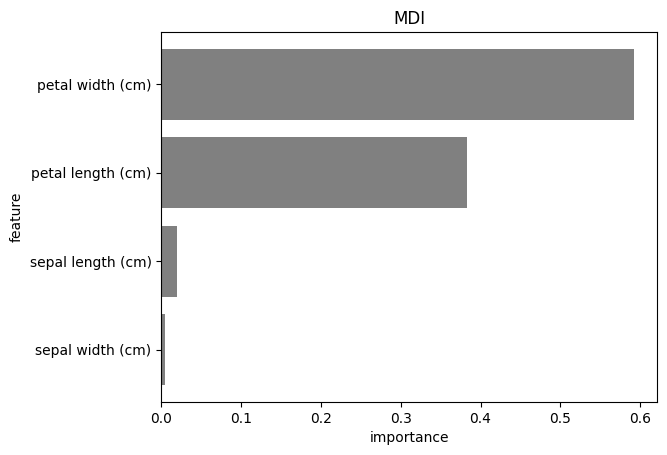

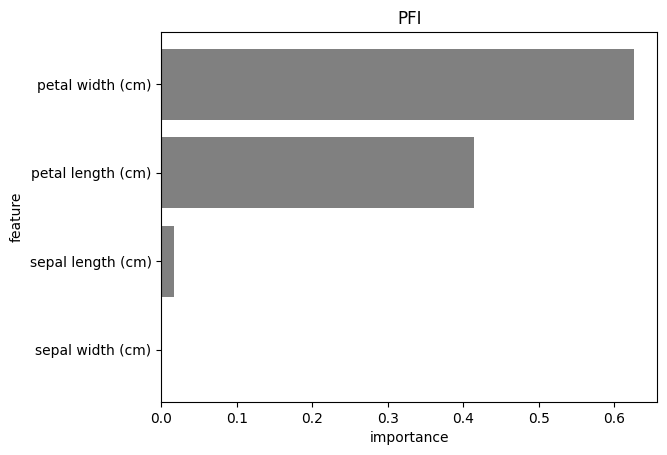

In [54]:
labels = data.target_names
features = data.feature_names

plt.barh(np.array(features)[indices_mdi], np.array(mdi)[indices_mdi], color='gray')
plt.title("MDI")
plt.ylabel("feature")
plt.xlabel("importance")
plt.show()

plt.barh(np.array(features)[indices_pfi], np.array(pfi)[indices_pfi], color='gray')
plt.title("PFI")
plt.ylabel("feature")
plt.xlabel("importance")
plt.show()


In [55]:
rand_feature = np.random.normal(loc = 2, scale = 1, size = (X.shape[0], 1))
X_ex = np.hstack([X, rand_feature])

X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y, stratify = y, random_state = 10, test_size = 0.2)

model_ = RandomForestRegressor(n_estimators = 5)
model_.fit(X_train_ex, y_train_ex)


RandomForestRegressor(n_estimators=5)

In [56]:
mdi_ = model_.feature_importances_
indices_mdi_ = np.argsort(mdi_)

pfi_result_ = permutation_importance(model_, X_test_ex, y_test_ex, n_repeats = 10, random_state = 50)
pfi_ = pfi_result_.importances_mean
indices_pfi_ = np.argsort(pfi_)

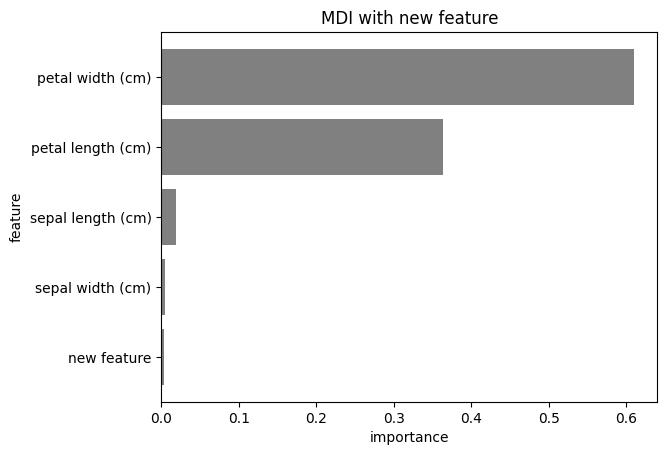

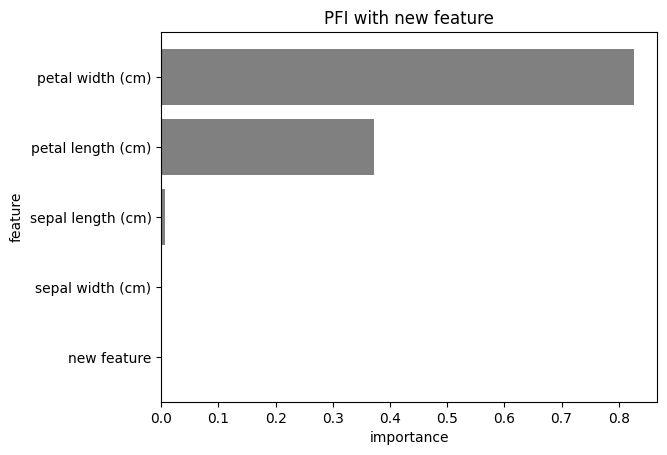

In [57]:
features_ = features
features_.append("new feature")

plt.barh(np.array(features_)[indices_mdi_], np.array(mdi_)[indices_mdi_], color='gray')
plt.title("MDI with new feature")
plt.ylabel("feature")
plt.xlabel("importance")
plt.show()

plt.barh(np.array(features_)[indices_pfi_], np.array(pfi_)[indices_pfi_], color='gray')
plt.title("PFI with new feature")
plt.ylabel("feature")
plt.xlabel("importance")
plt.show()

In [58]:
X_exx = np.hstack([X_ex, np.ones([X.shape[0], 1])])

X_train_exx, X_test_exx, y_train_exx, y_test_exx = train_test_split(X_exx, y, stratify = y, random_state = 10, test_size = 0.2)

model_1 = RandomForestRegressor(n_estimators = 5)
model_1.fit(X_train_exx, y_train_exx)

RandomForestRegressor(n_estimators=5)

In [59]:
mdi_1 = model_1.feature_importances_
indices_mdi_1 = np.argsort(mdi_1)

pfi_result_1 = permutation_importance(model_1, X_test_exx, y_test_exx, n_repeats = 10, random_state = 50)
pfi_1 = pfi_result_1.importances_mean
indices_pfi_1 = np.argsort(pfi_1)

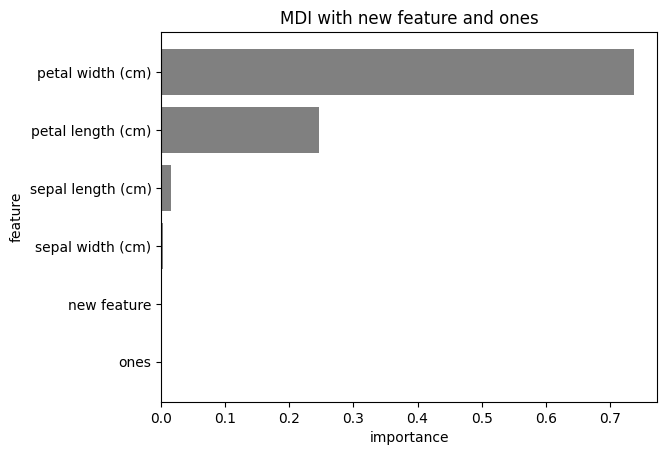

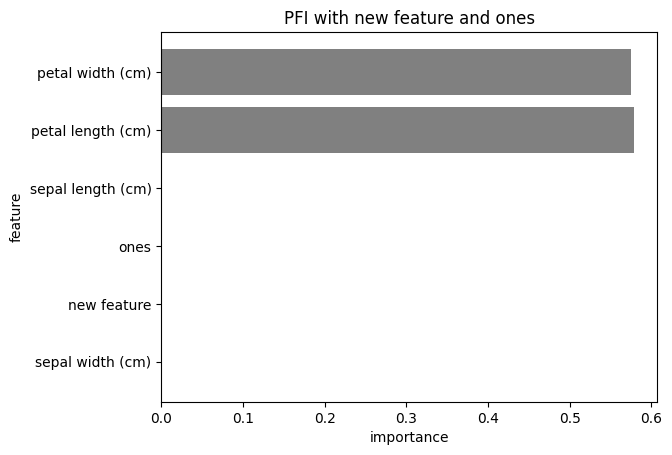

In [60]:
features_1 = features_
features_1.append("ones")

plt.barh(np.array(features_1)[indices_mdi_1], np.array(mdi_1)[indices_mdi_1], color = 'gray')
plt.title("MDI with new feature and ones")
plt.ylabel("feature")
plt.xlabel("importance")
plt.show()

plt.barh(np.array(features_1)[indices_pfi_1], np.array(pfi__)[indices_pfi_1], color = 'gray')
plt.title("PFI with new feature and ones")
plt.ylabel("feature")
plt.xlabel("importance")
plt.show()

Conclusions

1. MDI might rank random or irrelevant features as more important than they actually are because it depends on how frequently a feature is used to split the data, not whether it improves the model’s predictive performance.
2. PFI is a more robust measure for identifying features that really contribute to the model's performance, as it evaluates how sensitive the model's accuracy is to shuffling the feature values.
3. The constant feature is correctly identified by both MDI and PFI as unimportant, but MDI can be tricked into ranking random features higher than they deserve.